In [2]:
import matplotlib.pyplot as plt

def show_image(img, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

C:\Users\vigne\Desktop\CW2_PDE4434_Intelligent_Sensing\CW2_PDE4434_Intelligent_Sensing\Dataset\Testing


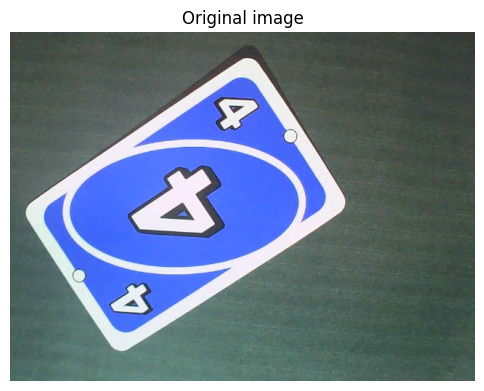

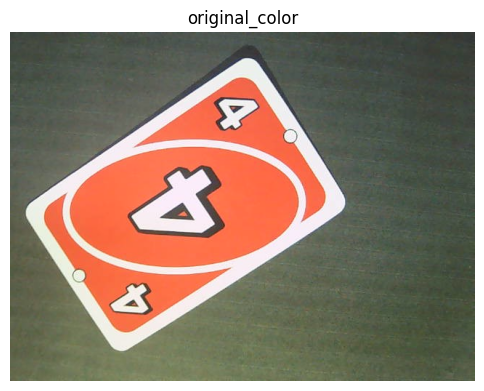

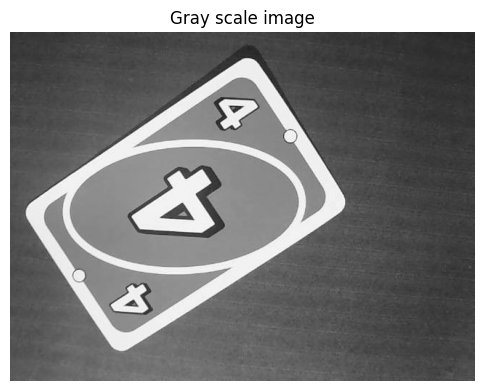

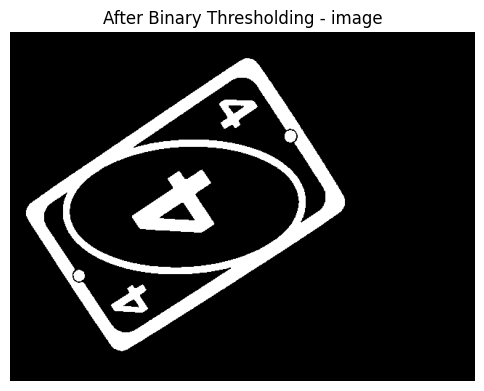

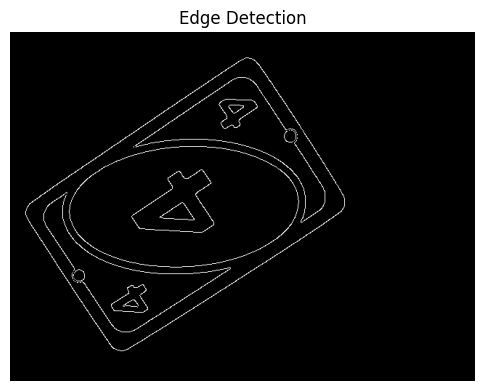

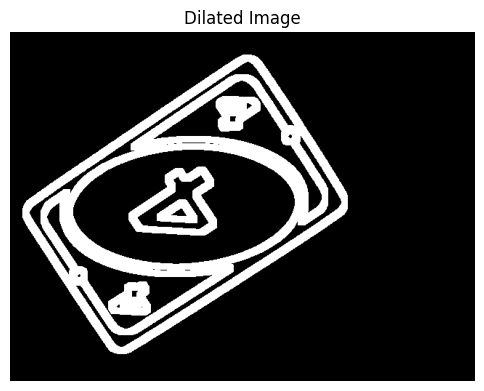

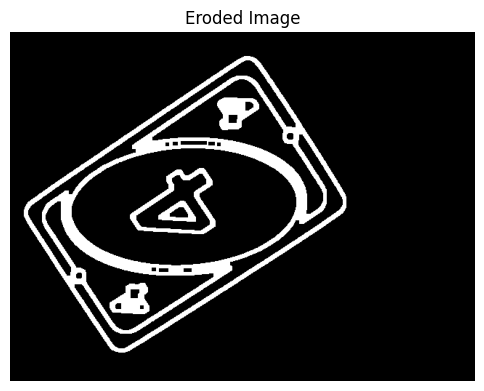

[[ 11 241]
 [332  27]
 [471 236]
 [150 450]]


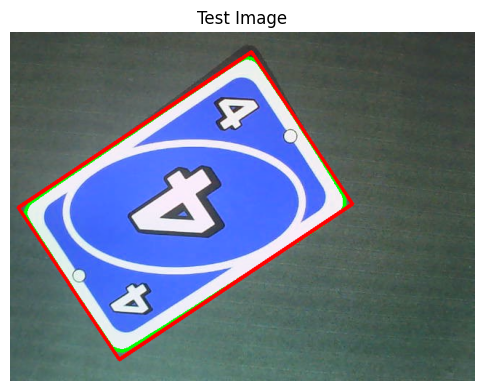

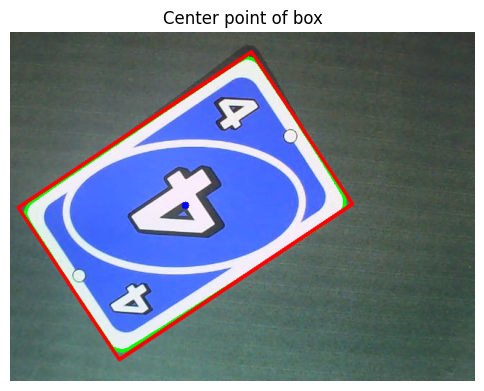

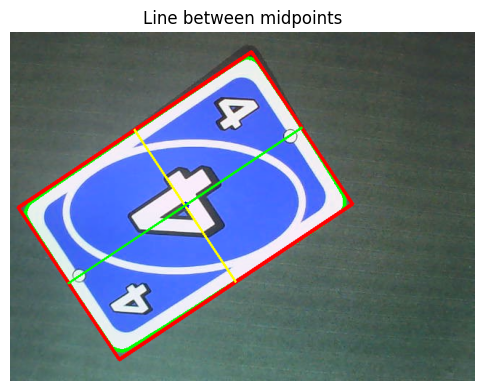

Line length 1&2 respectively 251.0019920239678 385.79398647464683


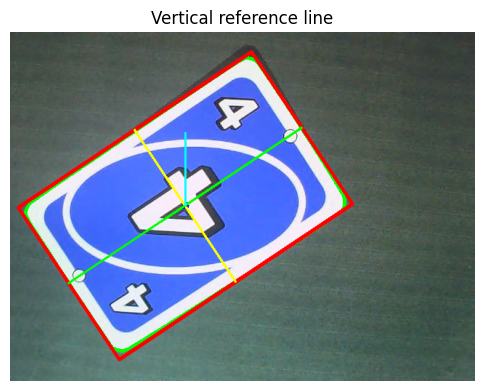

Angle between lines: 56.31 degrees


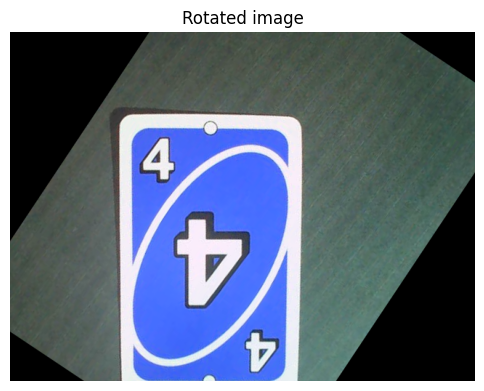

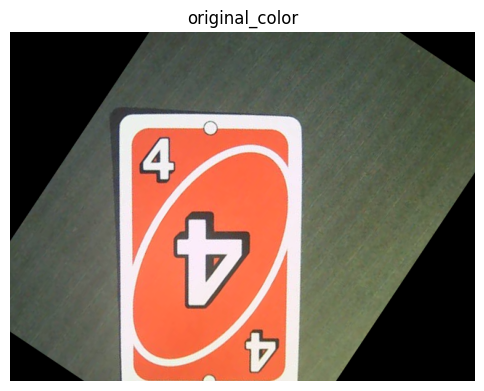

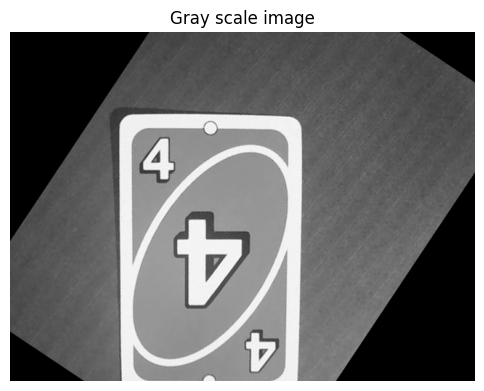

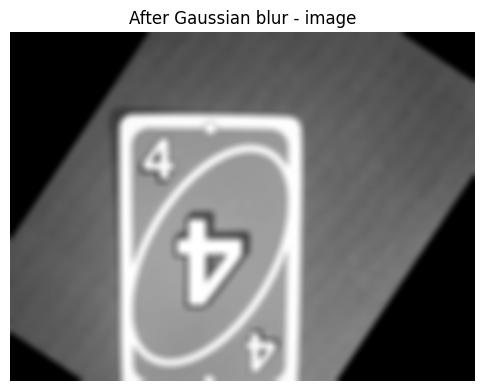

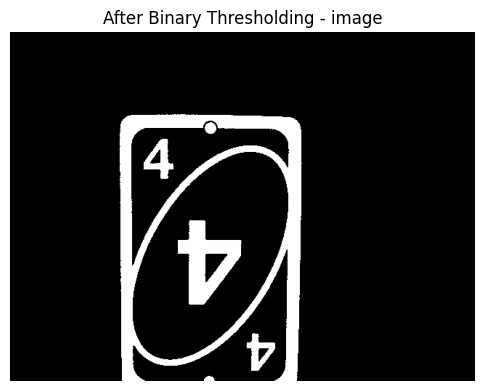

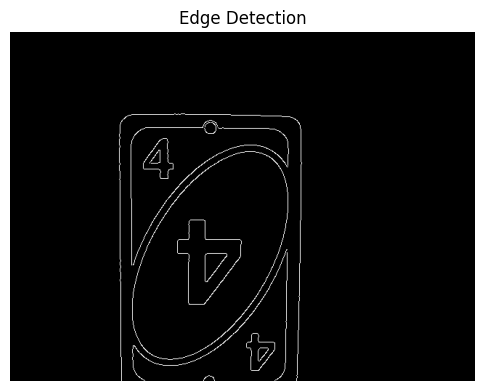

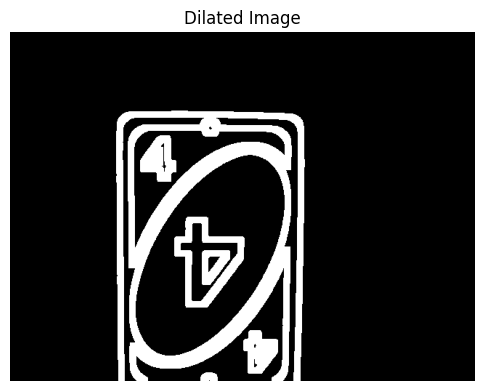

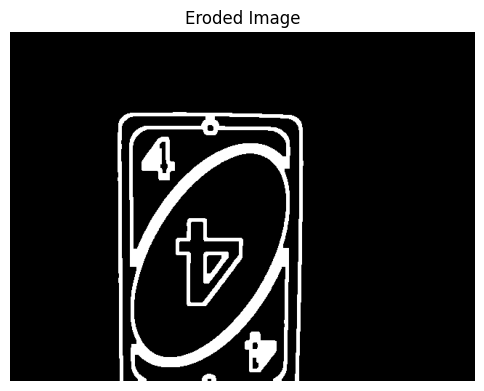

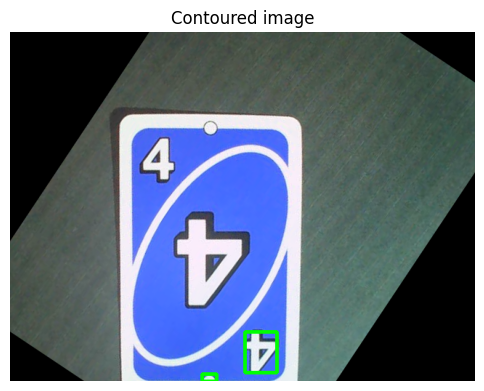

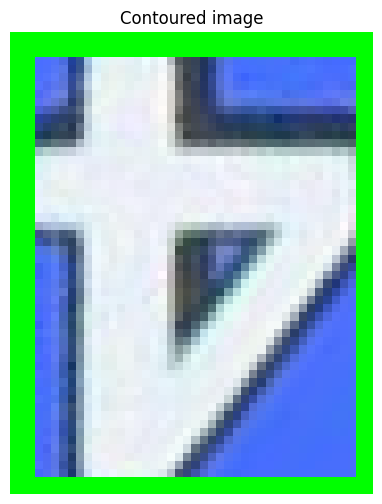

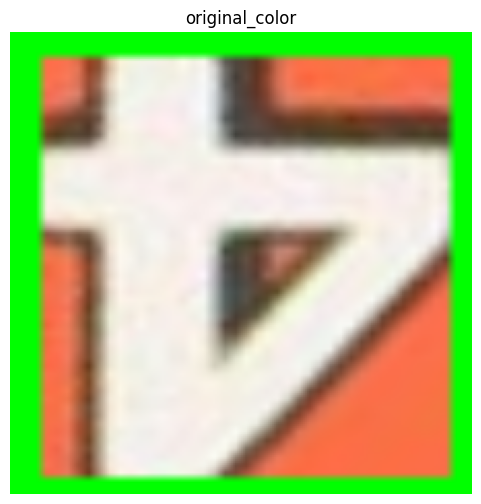

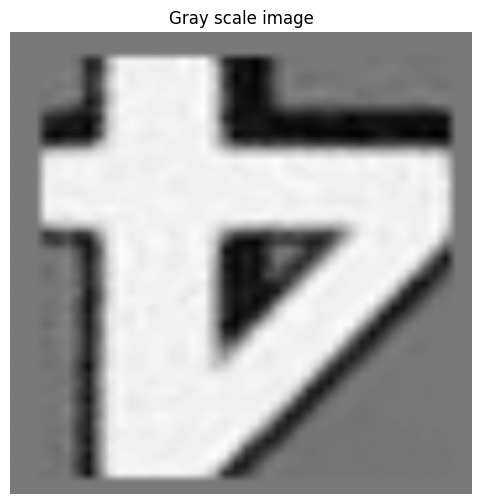

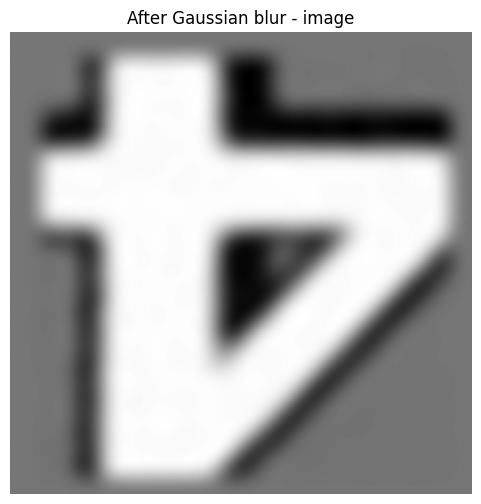

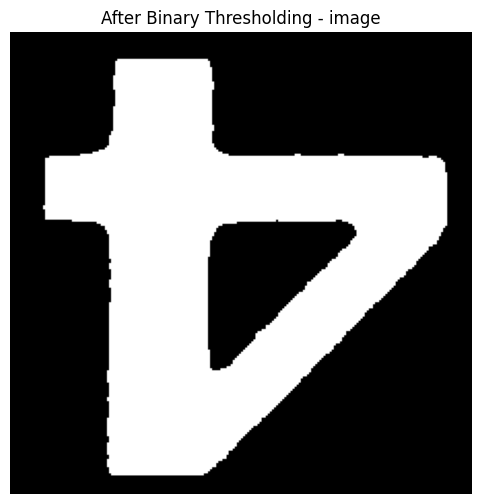

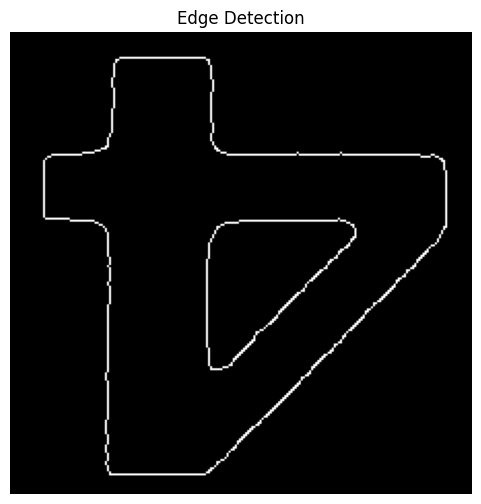

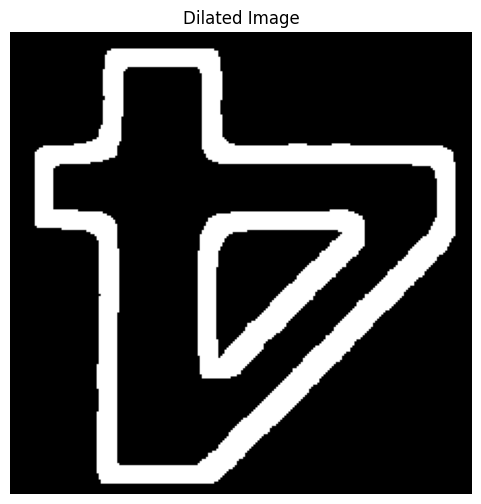

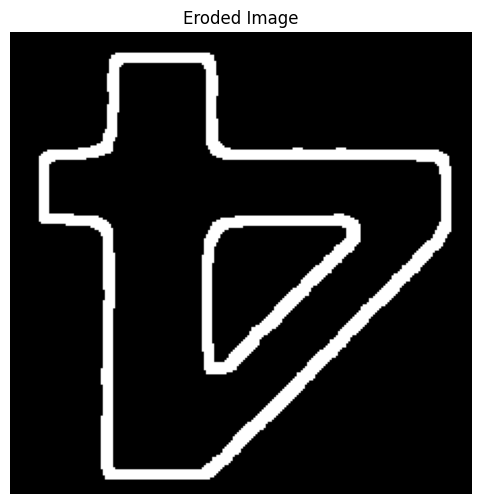

21496.5


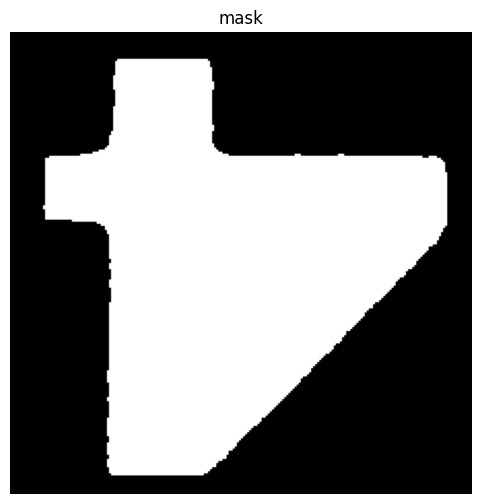

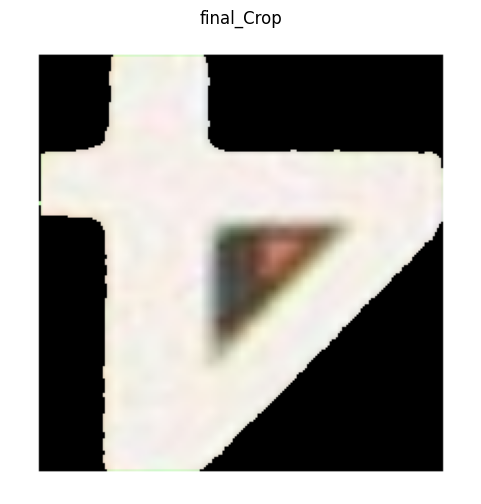

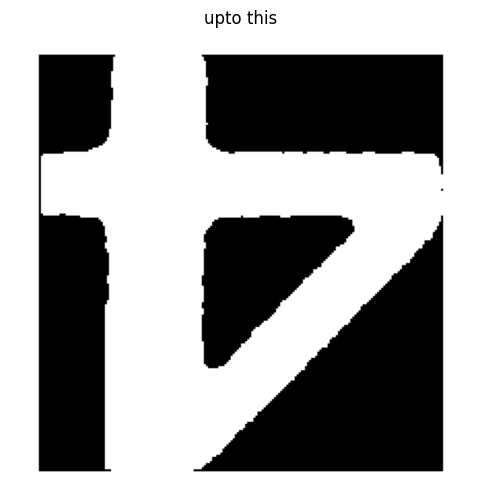

3109.5


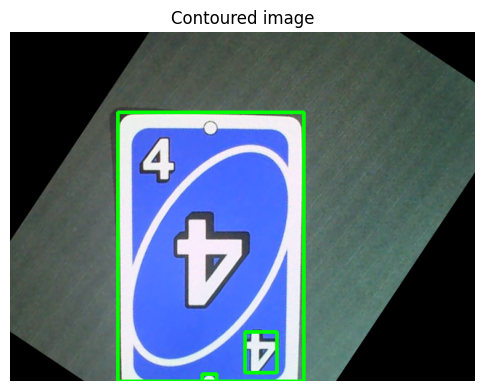

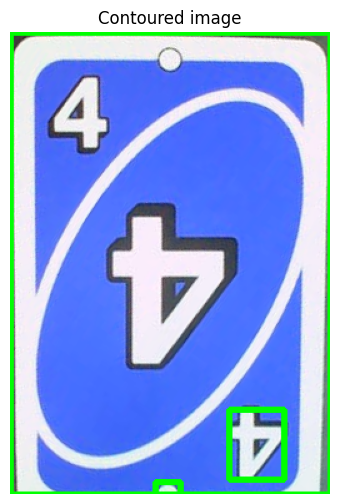

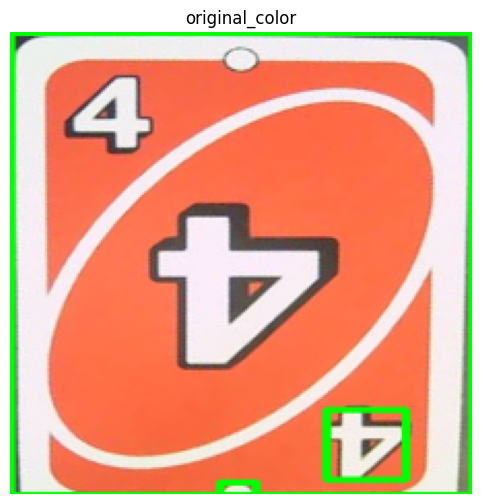

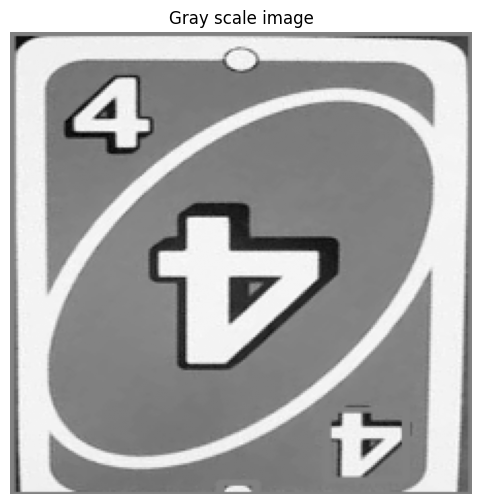

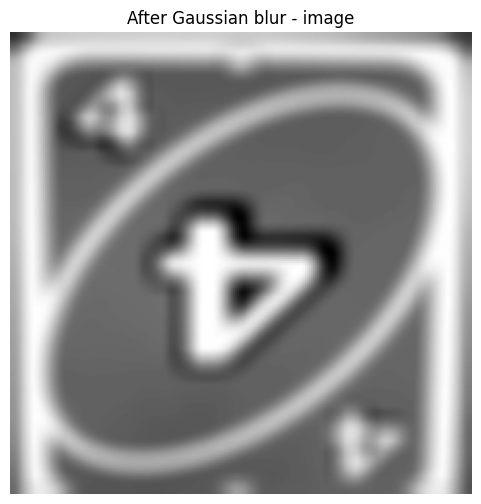

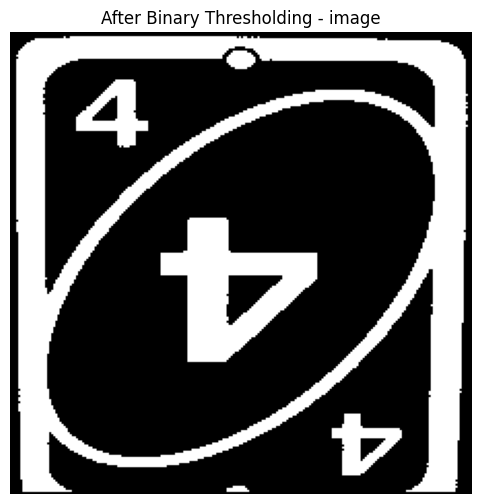

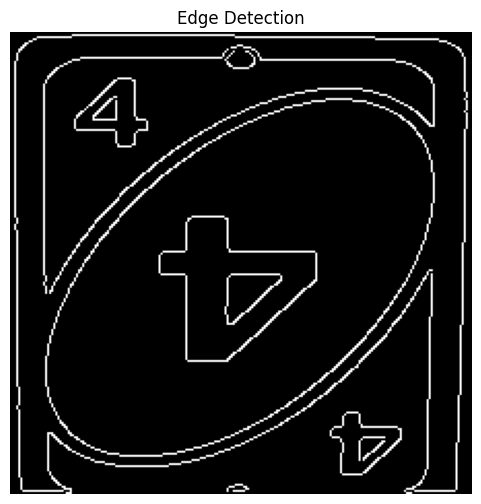

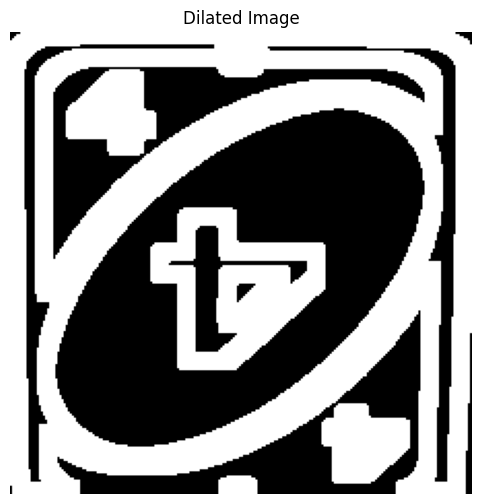

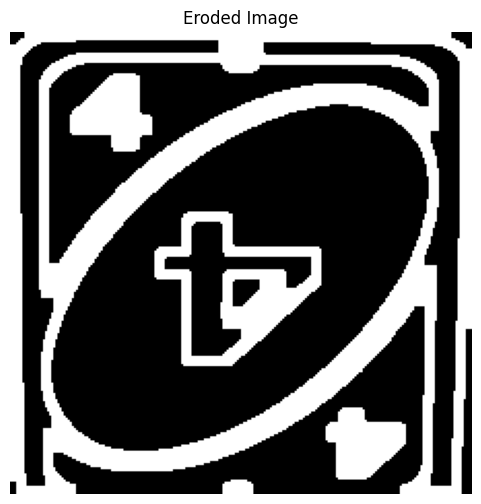

15.5
516.0
90.0
40395.0
22117.5


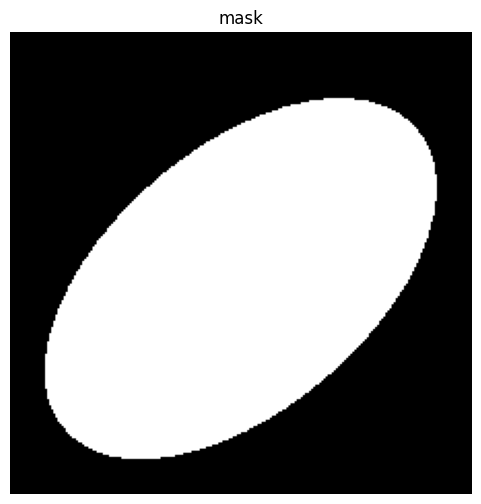

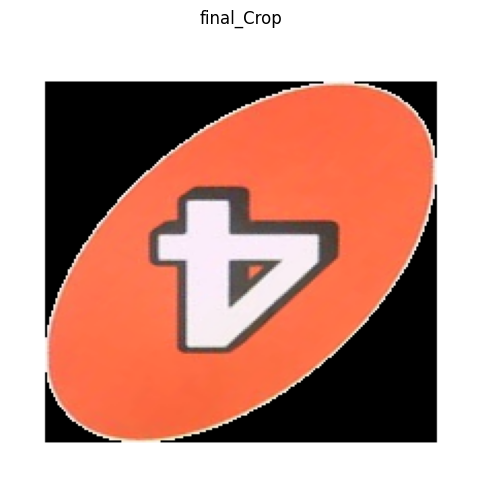

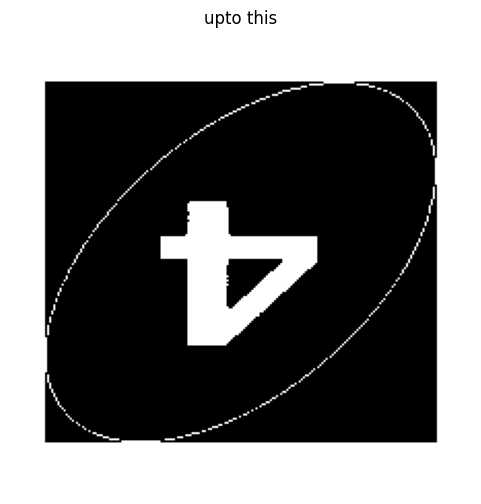

2803.5
392.0
7739.0
581.0
104.5
83.0
49729.0
33550.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2792.0
402.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
red


In [3]:
#sample of image preprocessing for nut
import cv2
import numpy as np
import tensorflow as tf
import time, math
from pathlib import Path
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


# using current working directory
base_dir = Path.cwd()
Test_dir = base_dir / "Dataset" / "Testing"
print(Test_dir)

test=4
value=str(test)
image = Test_dir / f"{value}.jpg" 

test_image = cv2.imread(image)
copy_image=test_image.copy()
show_image(test_image,"Original image",cmap="grey")

original_color=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
show_image(original_color,"original_color",cmap="grey")


gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
show_image(gray,"Gray scale image",cmap="grey")

#blurred = cv2.GaussianBlur(gray, (15, 15), 5)
#show_image(blurred,"After Gaussian blur - image",cmap="grey")

_, thresh = cv2.threshold(gray,200, 255, cv2.THRESH_BINARY)
show_image(thresh,"After Binary Thresholding - image",cmap="grey")

edges = cv2.Canny(thresh, 100, 200)
show_image(edges,"Edge Detection",cmap="grey")

kernel = np.ones((5, 5), np.uint8)

dilated = cv2.dilate(edges, kernel, iterations=2)
show_image(dilated,"Dilated Image",cmap="grey")

eroded = cv2.erode(dilated, kernel, iterations=1)
show_image(eroded,"Eroded Image",cmap="grey")

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(test_image, contours, -1, (0, 255, 0), 3)

for contour in contours:
    # Get the minimum area rectangle
    rect = cv2.minAreaRect(contour)
    
    # Get box points
    box = cv2.boxPoints(rect)
    box = box.astype(int)
    print(box)
    # Draw the contour
    cv2.drawContours(test_image, [box], -1, (255, 0, 0), 3)

show_image(test_image,"Test Image",cmap="grey")

# Calculate the center of the box
center_x = int(np.mean(box[:, 0]))
center_y = int(np.mean(box[:, 1]))

# Draw the center point
cv2.circle(test_image, (center_x, center_y), 5, (0, 0, 255), -1)  # Red dot at center
show_image(test_image, "Center point of box")

# Assume box points: [pt1, pt2, pt3, pt4]
pt1, pt2, pt3, pt4 = box

# Midpoint of pt1 - pt2
mid1 = ((pt1[0] + pt2[0]) // 2, (pt1[1] + pt2[1]) // 2)

# Midpoint of pt3 - pt4 (opposite side)
mid2 = ((pt3[0] + pt4[0]) // 2, (pt3[1] + pt4[1]) // 2)

#midpoint of pt1-pt4
mid3=((pt1[0] + pt4[0]) // 2, (pt1[1] + pt4[1]) // 2)

#midpoint of pt2-pt3
mid4 = ((pt3[0] + pt2[0]) // 2, (pt3[1] + pt2[1]) // 2)

# Draw the line between midpoints
cv2.line(test_image, mid1, mid2, (255, 255, 0), 2)  # Light blue line
cv2.line(test_image, mid3, mid4, (0, 255, 0), 2)
show_image(test_image, "Line between midpoints")

#distance between points or length of the line
line1_length=math.sqrt((mid2[0] - mid1[0])**2+(mid2[1] - mid1[1])**2)
line2_length=math.sqrt((mid4[0] - mid3[0])**2+(mid4[1] - mid3[1])**2)
print("Line length 1&2 respectively",line1_length,line2_length)

if line1_length>line2_length:
    midpoint1=mid1
    midpoint2=mid2
else:
    midpoint1=mid3
    midpoint2=mid4
    
# Define length of reference line
line_length = 100

# Starting point is center
start_point = (center_x, center_y)

# End point straight up (90 degrees)
end_point = (center_x, center_y - line_length)

# Draw the vertical reference line
cv2.line(test_image, start_point, end_point, (0, 255, 255), 2)  # Yellow line
show_image(test_image, "Vertical reference line")

# Vector of midpoint line
vector_x = midpoint2[0] - midpoint1[0]
vector_y = midpoint2[1] - midpoint1[1]

# Angle between vector and vertical line (0, -1)
angle_rad = np.arctan2(vector_y, vector_x) - np.arctan2(-1, 0)
angle_deg = np.degrees(angle_rad)
angle_deg = angle_deg % 360  # Ensure positive angle

print(f"Angle between lines: {angle_deg:.2f} degrees")

# Get image center
(h, w) = test_image.shape[:2]
image_center = (w // 2, h // 2)

# Compute rotation matrix
M = cv2.getRotationMatrix2D(image_center, angle_deg, 1.0)

# Perform the rotation
rotated = cv2.warpAffine(copy_image, M, (w, h))
show_image(rotated, "Rotated image")

#cycle2

cycle2_original=cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
show_image(cycle2_original,"original_color",cmap="grey")

gray_2 = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
show_image(gray_2,"Gray scale image",cmap="grey")

blurred_2 = cv2.GaussianBlur(gray_2, (15, 15), 5)
show_image(blurred_2,"After Gaussian blur - image",cmap="grey")

_, thresh_2 = cv2.threshold(gray_2,220, 255, cv2.THRESH_BINARY)
show_image(thresh_2,"After Binary Thresholding - image",cmap="grey")

edges_2 = cv2.Canny(thresh_2, 100, 200)
show_image(edges_2,"Edge Detection",cmap="grey")

kernel = np.ones((5, 5), np.uint8)

dilated_2 = cv2.dilate(edges_2, kernel, iterations=2)
show_image(dilated_2,"Dilated Image",cmap="grey")

eroded_2 = cv2.erode(dilated_2, kernel, iterations=1)
show_image(eroded_2,"Eroded Image",cmap="grey")

contours, _ = cv2.findContours(eroded_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Process only if we have at least one valid contour
for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(rotated, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
    
    if area > 500:  # Filter small areas
        #x, y, w, h = cv2.boundingRect(cnt)
        show_image(rotated,"Contoured image",cmap="grey")
        cropped = rotated[y:y+h, x:x+w]
        show_image(cropped,"Contoured image",cmap="grey")
        
        resize_img = cv2.resize(cropped, (224, 224))
        
        #cycle3
        cycle3_original=cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
        show_image(cycle3_original,"original_color",cmap="grey")
        
        gray_3 = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
        show_image(gray_3,"Gray scale image",cmap="grey")
        
        blurred_3 = cv2.GaussianBlur(gray_3, (15, 15), 5)
        show_image(blurred_3,"After Gaussian blur - image",cmap="grey")
        
        _, thresh_3 = cv2.threshold(gray_3,220, 255, cv2.THRESH_BINARY)
        show_image(thresh_3,"After Binary Thresholding - image",cmap="grey")
        
        edges_3 = cv2.Canny(thresh_3, 100, 200)
        show_image(edges_3,"Edge Detection",cmap="grey")
        
        kernel = np.ones((5, 5), np.uint8)
        
        dilated_3 = cv2.dilate(edges_3, kernel, iterations=2)
        show_image(dilated_3,"Dilated Image",cmap="grey")
        
        eroded_3 = cv2.erode(dilated_3, kernel, iterations=1)
        show_image(eroded_3,"Eroded Image",cmap="grey")

        contours, _ = cv2.findContours(thresh_3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #cv2.drawContours(resize_img, contours, -1, (0, 255, 0), 3)
        #show_image(resize_img,"center",cmap="grey")

        for cnt in contours:
            area2 = cv2.contourArea(cnt)
            print(area2)
            if area2> 19000 and area2 <30000:
                #cv2.drawContours(resize_img, [cnt], 0, (0,255,0), 3)
                #show_image(resize_img,"center",cmap="grey") 
                
                
                background = np.ones((224, 224, 3), dtype=np.uint8) * 255  
                
                # Create mask for the oval contour
                mask = np.zeros_like(resize_img)
                cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
                show_image(mask,"mask",cmap="grey")
                
                # Apply mask to extract oval region
                masked = cv2.bitwise_and(resize_img, mask)
                
                # Crop the contour region
                x, y, w, h = cv2.boundingRect(cnt)
                cropped = masked[y:y+h, x:x+w]
                
                # Get shape of cropped region
                ch, cw = cropped.shape[:2]

                target_size = 224
                # Compute offsets to center it
                x_offset = (target_size - cw) // 2
                y_offset = (target_size - ch) // 2
                
                # Paste cropped oval into the center of white background
                background[y_offset:y_offset+ch, x_offset:x_offset+cw] = cropped

                final_crop=cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
                show_image(final_crop,"final_Crop",cmap="grey")

                gray_final = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
                #show_image(gray_final,"Gray scale image",cmap="grey")

                _, thresh_final = cv2.threshold(gray_final,226, 255, cv2.THRESH_BINARY)
                show_image(thresh_final,"upto this",cmap="grey")

contours, _ = cv2.findContours(thresh_final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt2 in contours:
    area3 = cv2.contourArea(cnt2)
    cv2.rectangle(final_crop, (x, y), (x + w, y + h), (0, 255, 0), 3)
    print(area3)
    if area3 > 3500 and area3<5000:  # Filter small areas
        x, y, w, h = cv2.boundingRect(cnt2)
        cropped = final_crop[y:y+h, x:x+w]

        output_size = 244
        white_bg = np.ones((output_size, output_size, 3), dtype=np.uint8) 

        # Ensure cropped size fits
        ch, cw = cropped.shape[:2]
        if ch <= output_size and cw <= output_size:
            y_offset = (output_size - ch) // 2
            x_offset = (output_size - cw) // 2

            white_bg[y_offset:y_offset+ch, x_offset:x_offset+cw] = cropped
            show_image(white_bg,"center",cmap="grey")

            gray_final_1 = cv2.cvtColor(white_bg, cv2.COLOR_BGR2GRAY)
            #show_image(gray_final,"Gray scale image",cmap="grey")

            _, thresh_final_1 = cv2.threshold(gray_final_1,226, 255, cv2.THRESH_BINARY)
            show_image(thresh_final_1,"After Binary Thresholding - image",cmap="grey")

#find the color
def detect_card_color(img):
    """ Determining the color of the card using HSV color space """
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # color ranges for UNO colors
    colors = {
        "red": ([0, 120, 70], [10, 255, 255]),
        "yellow": ([20, 100, 100], [30, 255, 255]),
        "green": ([35, 100, 100], [85, 255, 255]),
        "blue": ([90, 100, 100], [130, 255, 255])
    }

    for color, (lower, upper) in colors.items():
        mask = cv2.inRange(hsv, np.array(lower), np.array(upper))
        if cv2.countNonZero(mask) > 500:  # If enough pixels match the color
            return color

    return "unknown"

color = detect_card_color(background)
print(color)